In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
raw_df = pd.read_csv('../raw_data/vestiaire.csv')
display(raw_df[0:2].T)

,0,1
product_id,43247626,43247441
product_type,Wool mini skirt,Jacket
product_name,Wool mini skirt Miu Miu Grey size S Internatio...,Jacket Barbara Bui Navy size 42 FR in Cotton
product_description,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,For selling nice women's suit Barbara Bui size...
product_keywords,Miu Miu Wool Skirts,Barbara Bui Cotton Jackets
product_gender_target,Women,Women
product_category,Women Clothing,Women Clothing
product_season,Autumn / Winter,All seasons
product_condition,Never worn,Very good condition
product_like_count,34.0,1.0


In [5]:
raw_df.shape

(900514, 36)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [7]:
raw_df.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [110]:
df1 = raw_df.copy()

In [27]:
#df1['usually_ships_within'] = df1['usually_ships_within'].replace({"NaN": np.nan})

In [111]:
df1.isna().mean() * 100

product_id                     0.000000
product_type                   0.000000
product_name                   0.000000
product_description            0.000777
product_keywords               0.131369
product_gender_target          0.000000
product_category               0.131369
product_season                 0.000222
product_condition              0.000000
product_like_count             0.000000
sold                           0.000000
reserved                       0.000000
available                      0.000000
in_stock                       0.000000
should_be_gone                 0.000000
brand_id                       0.000000
brand_name                     0.000000
brand_url                      0.000000
product_material               0.000444
product_color                  0.000111
price_usd                      0.000000
seller_price                   0.000000
seller_earning                 0.000000
seller_badge                   0.000000
has_cross_border_fees          1.525351


# Data Preparations Starts Here

In [76]:
# copying the raw df
df2 = raw_df.copy()
df2[0:2]

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0


In [77]:
# dropping 3 x numerical colns and 7 x cat colns
df2 = df2.drop(columns=['product_id','brand_id','seller_id','product_name','product_description','product_keywords','brand_url',
                       'seller_badge','warehouse_name','seller_username'], axis=1)
df2[0:2]

,product_type,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,...,seller_earning,has_cross_border_fees,buyers_fees,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,Wool mini skirt,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,...,216.94,NaN,NaN,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,Jacket,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,...,106.50,True,21.3,NaN,Belgium,0.0,0.0,0.0,8.0,0.0


In [80]:
# filling NaN values for some of the colns and dropping the rest
def simple_imputer(df):
    
    df.drop_duplicates()
    
    imputer1 = SimpleImputer(strategy="most_frequent")
    df['usually_ships_within'] = imputer1.fit_transform(df[['usually_ships_within']]).reshape(-1)
    df['product_category'] = imputer1.fit_transform(df[['product_category']]).reshape(-1)
    
    imputer2 = SimpleImputer(strategy='constant', fill_value='False')
    df['has_cross_border_fees'] = imputer2.fit_transform(df[['has_cross_border_fees']]).reshape(-1)
    
    imputer3 = SimpleImputer(strategy='median')
    df['buyers_fees'] = imputer3.fit_transform(df[['buyers_fees']]).reshape(-1)
    
    df.dropna(inplace=True)
        
    return df    

In [81]:
df2.shape

(900514, 26)

In [82]:
df2 = simple_imputer(df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900507 entries, 0 to 900513
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_type                900507 non-null  object 
 1   product_gender_target       900507 non-null  object 
 2   product_category            900507 non-null  object 
 3   product_season              900507 non-null  object 
 4   product_condition           900507 non-null  object 
 5   product_like_count          900507 non-null  float64
 6   sold                        900507 non-null  bool   
 7   reserved                    900507 non-null  bool   
 8   available                   900507 non-null  bool   
 9   in_stock                    900507 non-null  bool   
 10  should_be_gone              900507 non-null  bool   
 11  brand_name                  900507 non-null  object 
 12  product_material            900507 non-null  object 
 13  product_color      

In [83]:
df2[0:2].T

,0,1
product_type,Wool mini skirt,Jacket
product_gender_target,Women,Women
product_category,Women Clothing,Women Clothing
product_season,Autumn / Winter,All seasons
product_condition,Never worn,Very good condition
product_like_count,34.0,1.0
sold,True,False
reserved,False,False
available,True,True
in_stock,False,False


In [106]:
numerical_colns = df2.select_dtypes(include=np.number)
numerical_colns = numerical_colns[['product_like_count','price_usd', 'seller_price', 'seller_earning', 'buyers_fees', 'seller_products_sold', 'seller_num_products_listed', 'seller_community_rank', 'seller_num_followers', 'seller_pass_rate']]
numerical_colns

,product_like_count,price_usd,seller_price,seller_earning,buyers_fees,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,34.0,272.92,223.65,216.94,23.97,3.0,14.0,0.0,13.0,0.0
1,1.0,127.80,106.50,106.50,21.30,0.0,0.0,0.0,8.0,0.0
2,2.0,1278.00,1065.00,926.55,213.00,58.0,69.0,0.0,62.0,96.0
3,0.0,163.90,149.00,126.65,14.90,63.0,274.0,126346.0,131.0,96.0
4,1.0,119.72,99.77,83.55,19.95,19.0,14.0,102821.0,40.0,89.0
...,...,...,...,...,...,...,...,...,...,...
900509,1.0,89.46,74.55,60.71,14.91,40.0,17.0,391778.0,104.0,100.0
900510,1.0,153.36,127.80,108.63,25.56,26.0,99.0,51408.0,75.0,89.0
900511,0.0,191.70,159.75,138.98,31.95,0.0,2.0,0.0,3.0,0.0
900512,27.0,57.51,47.93,34.08,9.59,2.0,7.0,0.0,11.0,100.0


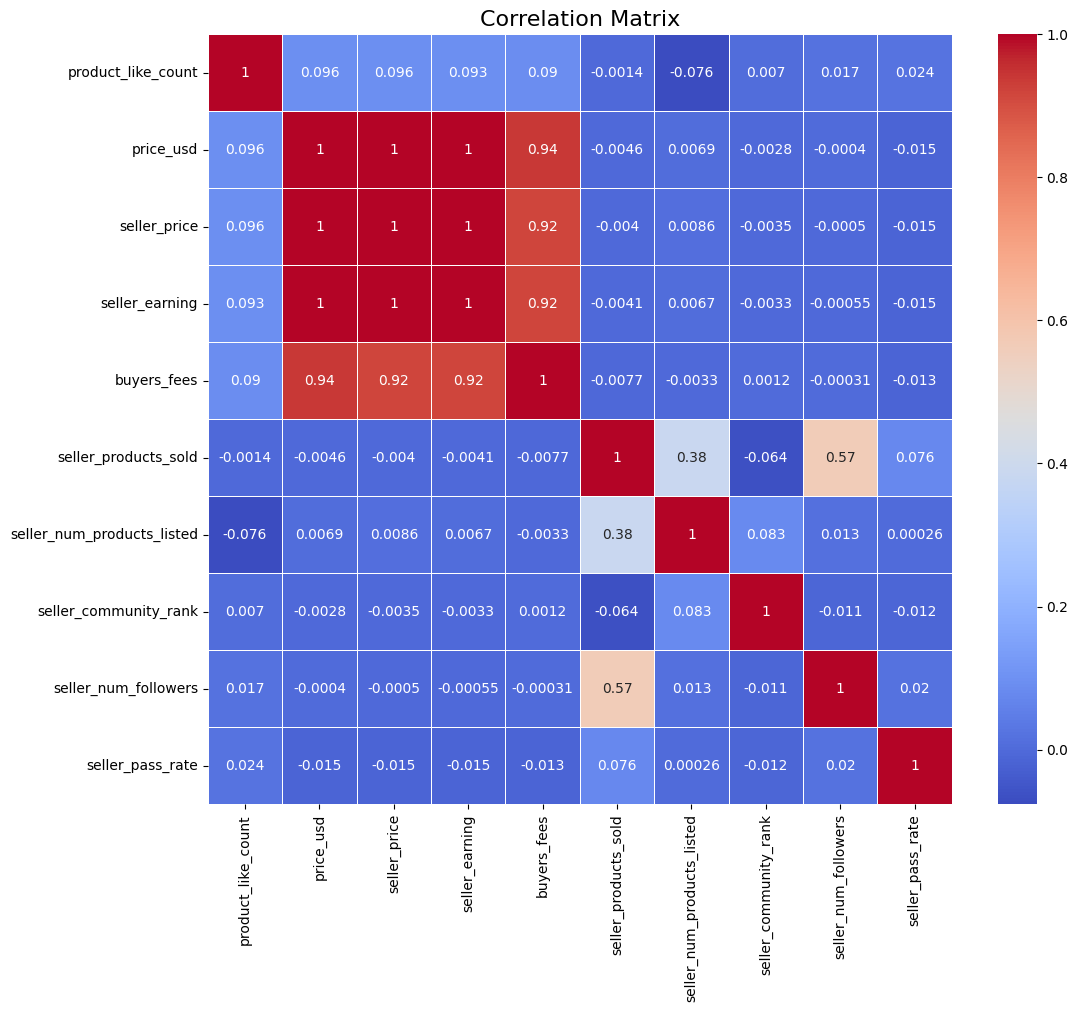

In [107]:
correlation_matrix = numerical_colns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [89]:
# copying features
X_preprocess = df2.drop(columns=['price_usd'])
X_preprocess.shape

(900507, 25)

In [90]:
# copying target
y_preprocess = df2[['price_usd']]
y_preprocess.shape

(900507, 1)

In [91]:
# checking for number of unique cat values for each cat feature
df2[df2.select_dtypes(exclude='number').columns].nunique().reset_index(name='cardinality')

,index,cardinality
0,product_type,10984
1,product_gender_target,2
2,product_category,6
3,product_season,3
4,product_condition,5
5,sold,2
6,reserved,1
7,available,2
8,in_stock,2
9,should_be_gone,2


In [92]:
cat_features = X_preprocess.select_dtypes(include=['object','bool']).columns
num_features = X_preprocess.select_dtypes(include='number').columns

In [93]:
num_features

Index(['product_like_count', 'seller_price', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [94]:
cat_features

Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'sold', 'reserved', 'available',
       'in_stock', 'should_be_gone', 'brand_name', 'product_material',
       'product_color', 'has_cross_border_fees', 'usually_ships_within',
       'seller_country'],
      dtype='object')

In [95]:
# data encoding function for both numeric and categorical features
def preprocessor(df):
       
    for col in df.columns:
        
        if df[col].dtype == 'object' or df[col].dtype == 'bool': 
            encoder = LabelEncoder()
            encoder.fit(list(df[col].values))
            df[col] = encoder.transform(df[col].values)
        else:
            scaler = StandardScaler()
            df[col] = scaler.fit_transform(df[[col]])

    return df

In [96]:
X_processed = preprocessor(X_preprocess)
X_processed[0:3].T

,0,1,2
product_type,10778.000000,4823.000000,10752.000000
product_gender_target,1.000000,1.000000,1.000000
product_category,4.000000,4.000000,4.000000
product_season,1.000000,0.000000,1.000000
product_condition,2.000000,4.000000,4.000000
product_like_count,2.144076,-0.410082,-0.332683
sold,1.000000,0.000000,0.000000
reserved,0.000000,0.000000,0.000000
available,1.000000,1.000000,1.000000
in_stock,0.000000,0.000000,0.000000


# Modelling Starts here

In [97]:
# random sampling 500k data from X_processed
n=len(X_processed)
N=list(range(n))
random.shuffle(N)
X_sample=X_processed.iloc[N[0:500000]]

In [98]:
X_sample.shape

(500000, 25)

In [99]:
# similarly for target
y_sample = y_preprocess.iloc[N[0:500000]]
y_sample.shape

(500000, 1)

In [100]:
# splitting X_sample and y_sample into test and train
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350000, 25), (150000, 25), (350000, 1), (150000, 1))

In [101]:
# using cross validation to train the baseline model
base_model = LinearRegression()

base_result = cross_val_score(base_model, X_train, y_train, cv=5, n_jobs=-1, scoring='r2').mean()

In [102]:
base_result

np.float64(0.999984349844809)

In [103]:
# fitting the model
base_model.fit(X_train,y_train)

LinearRegression()

In [104]:
# predicting y_pred
y_pred = base_model.predict(X_test)
y_pred

array([[ 57.38823173],
       [507.51666847],
       [191.66298188],
       ...,
       [ 76.57348477],
       [562.68925079],
       [182.49748102]])

In [105]:
# calculating r2 score
r2_score(y_test, y_pred)

0.999985901050945

In [112]:
# calculating mse
mean_squared_error(y_test, y_pred)

np.float64(36.845457611372176)

In [123]:
train_sizes = np.arange(1000,720405,20000)
len(train_sizes)

36

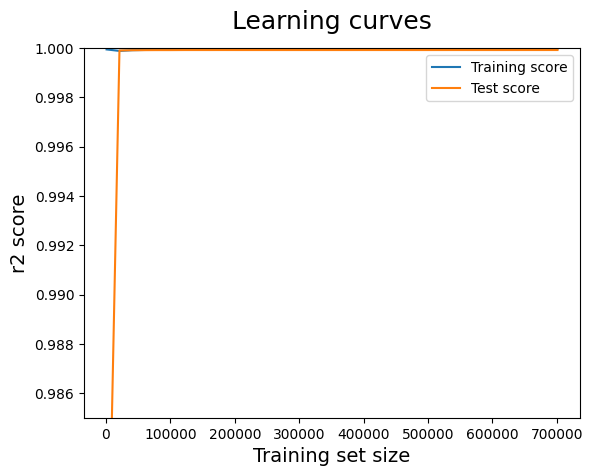

In [125]:
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), 
                                                        X=X_processed, y=y_preprocess, 
                                                        train_sizes=train_sizes, 
                                                        cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.ylim(0.985, 1.000) 
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [259]:
!git add notebook_SA.ipynb

In [260]:
!git commit -m 'Carried out baseline model updated'

[eda 9973550] Carried out baseline model updated
 1 file changed, 389 insertions(+), 918 deletions(-)


In [261]:
!git push origin eda

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.36 KiB | 220.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:aplabey/2nd_hand_fashion_valuation.git
   d15bccc..9973550  eda -> eda
